In [3]:
%matplotlib inline

In [4]:
import numpy as np

In [5]:
x = np.array([[1,2,3],[4,5,6]])

In [6]:
import matplotlib.pyplot as plt

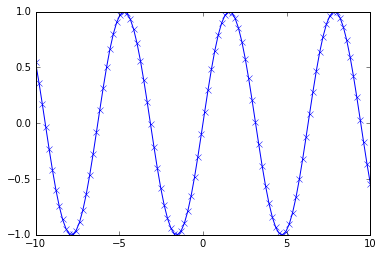

In [7]:
# -10から10まで100ステップに切った列を配列として生成
x = np.linspace(-10,10,100) 
#print(X)

# サイン関数を使って2つめの配列生成
y = np.sin(x)
#print(y)

# plot関数は一方の配列に対して他方の配列をプロットする
plt.plot(x, y, marker="x")

In [8]:
#study pandas P10
import pandas as pd
from IPython.core.display import display

In [9]:
# 人を表すデータセットの作成
data = {'Name' :["John","Anna", "Peter", "Linda"],
       'Location' :["New York","Paris", "Berlin", "London"],
                    'Age':[24,13,53,33]
                    }
print(data)

{'Location': ['New York', 'Paris', 'Berlin', 'London'], 'Name': ['John', 'Anna', 'Peter', 'Linda'], 'Age': [24, 13, 53, 33]}


In [10]:
data_pandas = pd.DataFrame(data)
display(data_pandas) # notebook上できれいに表示

Age  Location   Name
0   24  New York   John
1   13     Paris   Anna
2   53    Berlin  Peter
3   33    London  Linda

In [11]:
display(data_pandas[data_pandas.Age > 30])

Age Location   Name
2   53   Berlin  Peter
3   33   London  Linda

In [1]:
# mglearn
import mglearn

# use iris dataset

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [17]:
print(iris_dataset.keys())

dict_keys(['target', 'feature_names', 'DESCR', 'target_names', 'data'])


In [22]:
print(iris_dataset["DESCR"][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [35]:
print(iris_dataset["target_names"])
print(iris_dataset["feature_names"])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
iris_dataset["data"].shape

(150, 4)

In [41]:
iris_dataset["data"][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [42]:
iris_dataset["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
iris_dataset["target"].shape

(150,)

In [69]:
# 学習データ、予測データのきりわけ
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(iris_dataset["data"],iris_dataset["target"],random_state=0)

In [70]:
print(iris_dataset["data"].shape)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

print("y_test", y_test)

(150, 4)
X_train: (112, 4)
y_train: (112,)
X_test: (38, 4)
y_test: (38,)
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [78]:
# ペアプロット

# X_trainデータからDataFrameを作成
# iris_dataset.fearture_nameの文字列をカラムとして利用
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

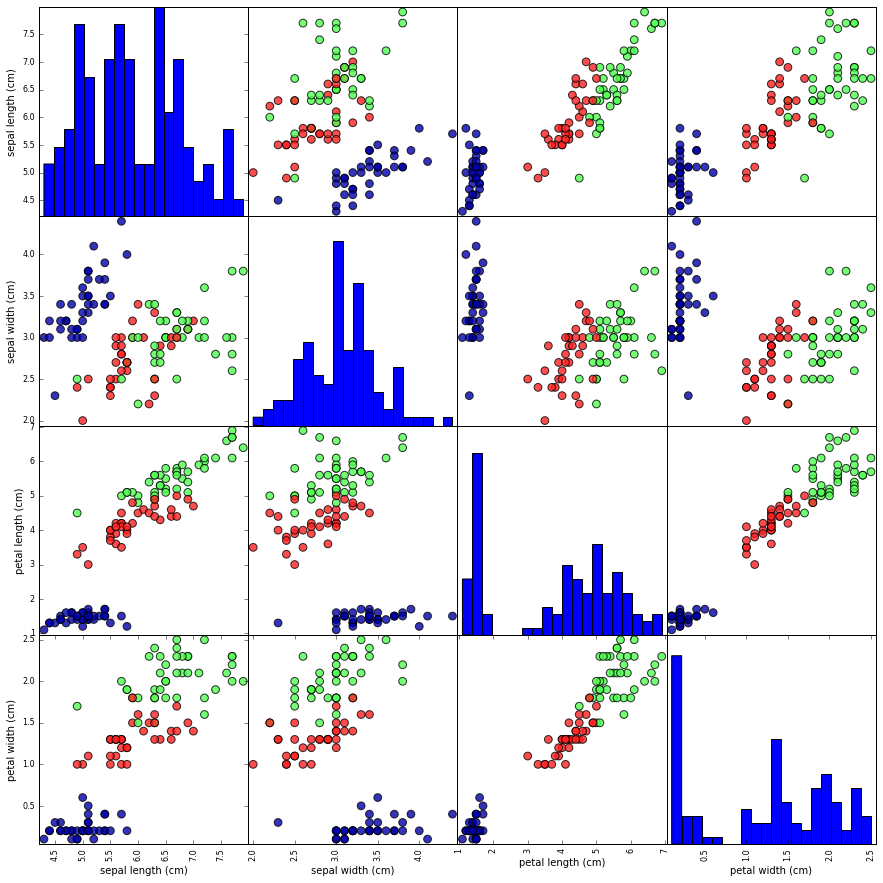

In [87]:
# display(iris_dataframe) 
# データフレームからscattermatrixを作成し、y_trainに従って色を付ける
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

# 最初のモデル : k-最近傍法

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [98]:
# 学習
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [108]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [109]:
# 予測
prediction = knn.predict(X_new)

In [110]:
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [111]:
# 評価

# 手動
y_pred = knn.predict(X_test)

In [114]:
print("y_pred:", y_pred)
print("y_test:", y_test)

y_pred: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
y_test: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [116]:
print("test score: {:.2f}".format(np.mean(y_pred==y_test)))

test score: 0.97


In [122]:
# テストセットに対する精度の算出(一発で出来て便利)
print("test set score: {:.2f}".format(knn.score(X_test, y_test)))

test set score: 0.97


# まとめ

In [123]:
# minimum ver
X_train,X_test, y_train, y_test = train_test_split(iris_dataset["data"],iris_dataset["target"],random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

print("test set score: {:.2f}".format(knn.score(X_test, y_test)))

test set score: 0.97
